<a href="https://colab.research.google.com/github/economicactivist/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [2079]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
plt.style.use('fivethirtyeight')


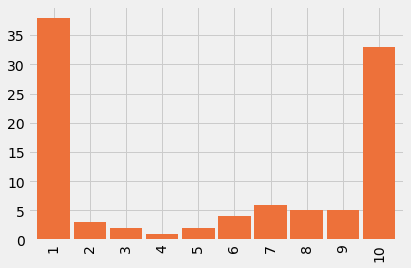

In [2082]:
data = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

data.plot.bar(color='#ed713a', width=.9);   #used color_picker extentions, as suggested

##checking how value_counts() looks without sorting the index

In [2083]:
graph2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

graph2.value_counts()#.sort_index()#.plot.bar(color='#ed713a', width=0.9);

1     24
10    18
7      5
9      4
8      4
6      4
5      3
3      3
2      3
4      2
dtype: int64

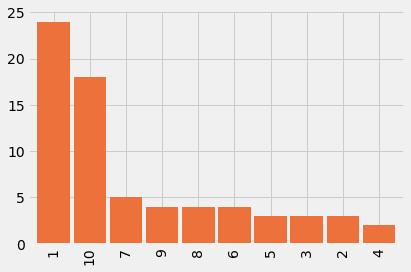

In [2084]:
graph2.value_counts().plot.bar(color='#ed713a', width=0.9);  
#graphs grouped items in order of occurence in series returned by value_counts()

##checking with *sort_index*

In [2085]:
graph2.value_counts().sort_index()#.plot.bar(color='#ed713a', width=0.9);

1     24
2      3
3      3
4      2
5      3
6      4
7      5
8      4
9      4
10    18
dtype: int64

##plotting without adjusting width

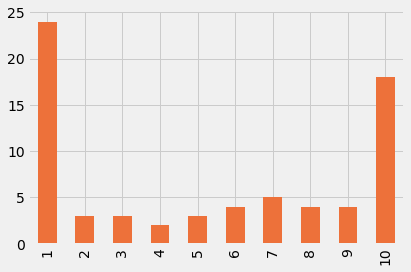

In [2086]:
graph2.value_counts().sort_index().plot.bar(color='#ed713a')

###There is lots of spacing by default

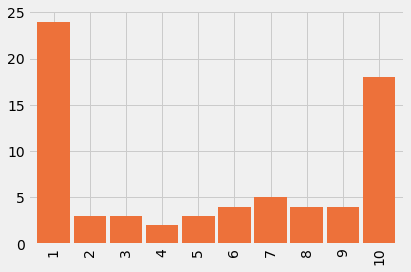

In [2087]:
graph2.value_counts().sort_index().plot.bar(color='#ed713a', width=0.9);

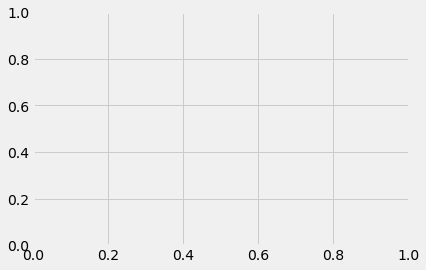

In [2088]:
fig, ax = plt.subplots()  #preparing area one which to chart data

In [0]:
graph3 = graph2.value_counts(normalize=True).sort_index()   #assigning a pre-sorted series to new variable

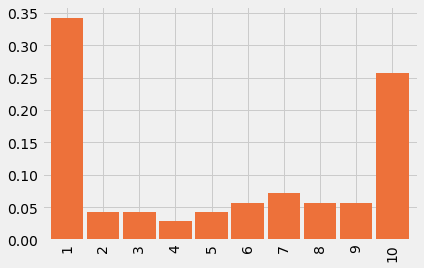

In [2090]:
graph3.plot.bar(graph3, width=0.9, color='#ed713a')

At first I didn't understand why only *one* graphing parameter was being passed to bar() but from the notes the pop up when typing in the bar(), the dataframe's index is used by default if no x parameter is passed.  Even though graph3 is based on a Series (not dataframe) it seems that the rule is applicable to Series data structures as well. 

In [2091]:
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             loc='left', 
             color="black", 
             fontsize=13, 
             fontweight='bold', 
             x=-.07, 
             y=1.1)



Text(-0.07, 1.1, "'An Inconvenient Sequel: Truth To Power' is divisive")

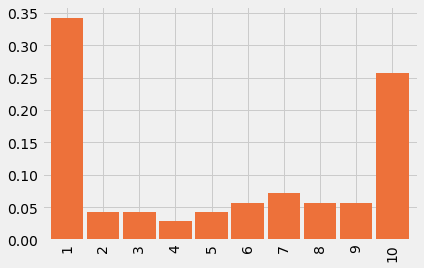

In [2092]:
graph3.plot.bar(graph3, width=0.9, color='#ed713a')

ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             loc='left', 
             color="black", 
             fontsize=13, 
             fontweight='bold', 
             x=-.07, 
             y=1.1)
plt.show()

For some reason, I can't get the title to show up, even when I adjust x and y.  I guess all the code for a chart has to be put in a single cell in colab.  I'll test out this theory. 

Text(-0.07, 1.1, "'An Inconvenient Sequel: Truth To Power' is divisive")

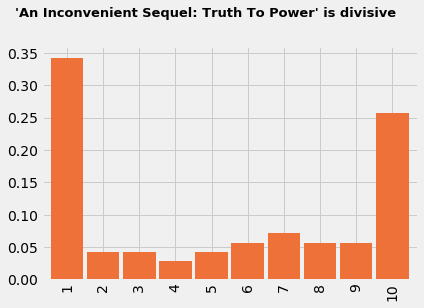

In [2093]:
plt.style.use('fivethirtyeight')

# figure / axes syntax
fig, ax = plt.subplots()

# plot the bars
graph3.plot.bar(graph3, width=0.9, color='#ED7139')

# title
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             loc='left', 
             color="black", 
             fontsize=13, 
             fontweight='bold', 
             x=-.07, 
             y=1.1)


I looks like my guess was right.  Something to remember in the future. 

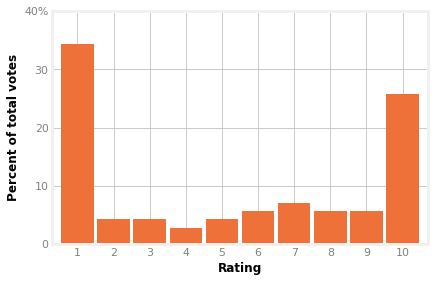

In [2094]:
#Set Stylesheet
plt.style.use('fivethirtyeight')

# figure / axes syntax
fig, ax = plt.subplots()

# plot the bars
graph3.plot.bar(graph3, width=0.9, color='#ED7139')

# title
# #ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
#              loc='left', 
#              color="black", 
#              fontsize=13, 
#              fontweight='bold', 
#              x=-.07, 
#              y=1.1)

# Subtitle
# ax.text(s='IMDb ratings for the film as of Aug. 29', 
#         x=-1.4, 
#         y=42, 
#         color='black', 
#         fontsize=12)

# x label
ax.set_xlabel('Rating', color='Black', fontsize=12, fontweight='bold')

# y label
ax.set_ylabel('Percent of total votes', color='Black', fontsize=12, fontweight='bold')

# x axis tick labels
ax.set_xticklabels(labels=range(1,11,1), color='gray', rotation='horizontal', fontsize='11')

# y axis tick labels
ax.set_yticklabels(labels=["0", "10", "20", "30", "40%"], color='gray', fontsize='11')

# set y ticks
ax.set_yticks(ticks=np.linspace(0,.4, 5))

# set figure background color
fig.set_facecolor(color="white")
# fig.patch.set(facecolor='white')

# Set the axes background color
# ax.set(facecolor='white')
ax.set_facecolor(color='white')

In [2095]:
display(example)

In [2096]:
graph3 

1     0.342857
2     0.042857
3     0.042857
4     0.028571
5     0.042857
6     0.057143
7     0.071429
8     0.057143
9     0.057143
10    0.257143
dtype: float64

###Now I see that the second fake data set from the lecture wasn't close enough to the real graph. I'll use the data from the first "fake" variable in the lecture colab

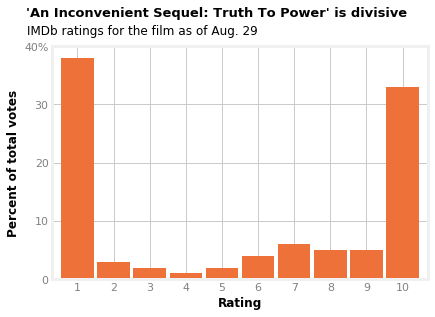

In [2097]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

data.plot.bar(data, width=0.9, color='#ED7139')


ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             loc='left', 
             color="black", 
             fontsize=13, 
             fontweight='bold', 
             x=-.07, 
             y=1.1)

ax.text(s='IMDb ratings for the film as of Aug. 29', 
        x=-1.4, 
        y=42, 
        color='black', 
        fontsize=12)

ax.set_xlabel('Rating', color='Black', fontsize=12, fontweight='bold')

ax.set_ylabel('Percent of total votes', color='Black', fontsize=12, fontweight='bold')

ax.set_xticklabels(labels=range(1,11,1), color='gray', rotation='horizontal', fontsize='11')

ax.set_yticklabels(labels=["0", "10", "20", "30", "40%"], color='gray', fontsize='11')


ax.set_yticks(ticks=range(0,50,10))

fig.set_facecolor(color="white")

ax.set_facecolor(color='white')

In [2098]:
display(example)

###need remove left and right spines

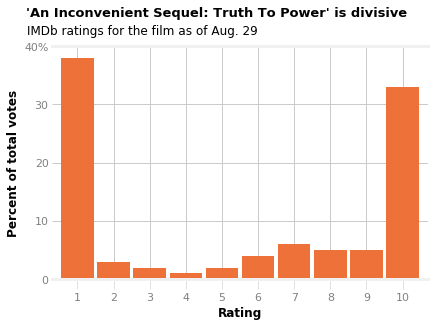

In [2099]:
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

data.plot.bar(data, width=0.9, color='#ED7139')


ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             loc='left', 
             color="black", 
             fontsize=13, 
             fontweight='bold', 
             x=-.07, 
             y=1.1)

ax.text(s='IMDb ratings for the film as of Aug. 29', 
        x=-1.4, 
        y=42, 
        color='black', 
        fontsize=12)

ax.set_xlabel('Rating', color='Black', fontsize=12, fontweight='bold')

ax.set_ylabel('Percent of total votes', color='Black', fontsize=12, fontweight='bold')

ax.set_xticklabels(labels=range(1,11,1), color='gray', rotation='horizontal', fontsize='11')

ax.set_yticklabels(labels=["0", "10", "20", "30", "40%"], color='gray', fontsize='11')



ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params('x', length=10, which='major', color="#dadada")



ax.set_yticks(ticks=range(0,50,10))

fig.set_facecolor(color="white")

ax.set_facecolor(color='white')

In [0]:
#!sudo apt install font-manager

In [0]:
!rm ~/.cache/matplotlib -fr

In [2102]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [0]:
#!sudo apt-get install msttcorefonts -qq

###Trying to change the font style was unsuccessful.  Going to move the other part of the exericse because I have less than two hours remaining. 

In [2104]:

url2 = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example2 = Image(url=url2, width=400)

display(example2)

Using data associated with [this article ](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/) from [this github](https://github.com/fivethirtyeight/data/blob/master/daily-show-guests/daily_show_guests.csv) repo.

In [0]:
daily_show = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')

In [2106]:
daily_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 5 columns):
YEAR                         2693 non-null int64
GoogleKnowlege_Occupation    2667 non-null object
Show                         2693 non-null object
Group                        2662 non-null object
Raw_Guest_List               2693 non-null object
dtypes: int64(1), object(4)
memory usage: 105.3+ KB


In [2107]:
daily_show.tail()

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
2688,2015,biographer,7/29/15,Media,Doris Kearns Goodwin
2689,2015,director,7/30/15,Media,J. J. Abrams
2690,2015,stand-up comedian,8/3/15,Comedy,Amy Schumer
2691,2015,actor,8/4/15,Acting,Denis Leary
2692,2015,comedian,8/5/15,Comedy,Louis C.K.


In [2108]:
display(example2)

In [2109]:
daily_show.Group.value_counts(normalize=True)  

Acting            0.349361
Media             0.282119
Politician        0.115702
Comedy            0.056349
Musician          0.046206
Academic          0.038693
Athletics         0.019534
Misc              0.016905
Government        0.015026
Political Aide    0.013524
Science           0.010518
Business          0.009391
Advocacy          0.009016
Consultant        0.006762
Military          0.006011
Clergy            0.003005
media             0.001878
Name: Group, dtype: float64

###overall actors, media, and politicians make up the largest categories, but as the graph shows, I expect the groups to vary significantly over time

In [2110]:
daily_show.groupby('YEAR').Group.value_counts(dropna=False).unstack()

Group,NaN,Academic,Acting,Advocacy,Athletics,Business,Clergy,Comedy,Consultant,Government,Media,Military,Misc,Musician,Political Aide,Politician,Science,media
YEAR,,,,,,,,,,,,,,,,,,
1999,3.0,NaN,108.0,NaN,NaN,NaN,NaN,25.0,NaN,NaN,11.0,NaN,NaN,17.0,NaN,2.0,NaN,NaN
2000,4.0,NaN,100.0,1.0,3.0,1.0,NaN,12.0,NaN,NaN,21.0,NaN,NaN,13.0,1.0,13.0,NaN,NaN
2001,1.0,2.0,92.0,NaN,1.0,NaN,NaN,11.0,NaN,2.0,30.0,NaN,2.0,11.0,1.0,3.0,NaN,1.0
2002,2.0,NaN,84.0,1.0,2.0,NaN,1.0,5.0,NaN,1.0,39.0,NaN,1.0,10.0,2.0,8.0,NaN,3.0
2003,7.0,4.0,74.0,NaN,NaN,NaN,1.0,12.0,1.0,2.0,41.0,NaN,1.0,7.0,1.0,14.0,1.0,NaN
2004,3.0,1.0,51.0,4.0,2.0,2.0,1.0,7.0,4.0,3.0,45.0,NaN,NaN,5.0,2.0,32.0,2.0,NaN
2005,NaN,12.0,44.0,NaN,2.0,1.0,NaN,5.0,1.0,1.0,54.0,1.0,4.0,11.0,3.0,22.0,1.0,NaN
2006,1.0,9.0,44.0,NaN,5.0,1.0,NaN,8.0,4.0,3.0,47.0,1.0,3.0,6.0,3.0,25.0,1.0,NaN
2007,1.0,13.0,25.0,2.0,4.0,2.0,1.0,9.0,2.0,1.0,47.0,3.0,2.0,2.0,2.0,21.0,4.0,NaN


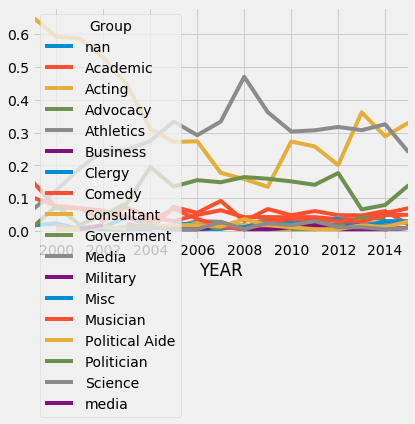

In [2111]:
daily_show.groupby('YEAR').Group.value_counts(normalize=True, dropna=False).unstack().plot()

In [2112]:
display(example2)

### A rough view shows similarities between the original plot and the plot intend to create.  For example, the "Acting" category [red in top graph] is very similar to the "Acting, Comedy, & Music" category [blue in bottom graph] of the original plot 

In [2113]:
daily_show.Group.value_counts().index

Index(['Acting', 'Media', 'Politician', 'Comedy', 'Musician', 'Academic',
       'Athletics', 'Misc', 'Government', 'Political Aide', 'Science',
       'Business', 'Advocacy', 'Consultant', 'Military', 'Clergy', 'media'],
      dtype='object')

###We see from the original graph that "Acting, Media, and Music" are combined, as is "Politician and Government".  However it is not completely clear which categories were chosen for polician and goverment".  I assume that the relevant categories for this group are:

'Politician', 'Government', 'Political Aide', and 'Military'
      

In [2114]:
daily_show[daily_show.Group.isin(['Acting', 'Media', 'Politician', 
                                   'Comedy', 'Musician', 'Government', 
                                   'Political Aide', 'Military'])]

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier
...,...,...,...,...,...
2688,2015,biographer,7/29/15,Media,Doris Kearns Goodwin
2689,2015,director,7/30/15,Media,J. J. Abrams
2690,2015,stand-up comedian,8/3/15,Comedy,Amy Schumer
2691,2015,actor,8/4/15,Acting,Denis Leary


In [0]:
#filter for relevant groups and assign to variable "ds_relevant_groups"
ds_relevant_groups = daily_show[daily_show.Group.isin(['Acting', 'Media', 'Politician', 
                                   'Comedy', 'Musician', 'Government', 
                                   'Political Aide', 'Military'])].copy()

In [2116]:
ds_relevant_groups.Group.isna().sum()

0

In [0]:
ds_relevant_groups = ds_relevant_groups.reset_index(drop=True)

In [2118]:
ds_relevant_groups.Group.tail()

2349     Media
2350     Media
2351    Comedy
2352    Acting
2353    Comedy
Name: Group, dtype: object

In [2119]:
ds_relevant_groups.Group.value_counts(dropna=False)

Acting            930
Media             751
Politician        308
Comedy            150
Musician          123
Government         40
Political Aide     36
Military           16
Name: Group, dtype: int64

In [2120]:
#same method of grouping and stacking that was done to the orginal plot
#one major benefit is that the index will automatically be used for the x-axis when plotting

ds_relevant_groups.groupby('YEAR').Group.value_counts().unstack()

Group,Acting,Comedy,Government,Media,Military,Musician,Political Aide,Politician
YEAR,,,,,,,,
1999,108.0,25.0,NaN,11.0,NaN,17.0,NaN,2.0
2000,100.0,12.0,NaN,21.0,NaN,13.0,1.0,13.0
2001,92.0,11.0,2.0,30.0,NaN,11.0,1.0,3.0
2002,84.0,5.0,1.0,39.0,NaN,10.0,2.0,8.0
2003,74.0,12.0,2.0,41.0,NaN,7.0,1.0,14.0
2004,51.0,7.0,3.0,45.0,NaN,5.0,2.0,32.0
2005,44.0,5.0,1.0,54.0,1.0,11.0,3.0,22.0
2006,44.0,8.0,3.0,47.0,1.0,6.0,3.0,25.0
2007,25.0,9.0,1.0,47.0,3.0,2.0,2.0,21.0


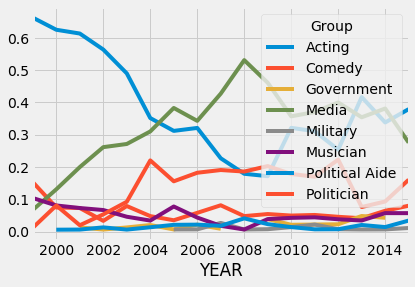

In [2121]:
ds_relevant_groups.groupby('YEAR').Group.value_counts(normalize=True, dropna=False).unstack().plot()

In [2122]:
display(example2)

In [0]:
#use for loop to combine occupations into three major groups: 
def combine_cats(series_x):
  occupations = []
  for occupation in series_x:
    if occupation in ['Acting', 'Comedy', 'Musician']:
      occupations.append("Acting, Comedy, & Music")
    elif occupation in ['Government', 'Political Aide', 'Politician', 'Military']:
      occupations.append("Government and Politics")
    elif occupation in ['Media']:
      occupations.append("Media")
    else: 
      occupations.append("Other")
  return pd.Series(occupations)


In [2124]:
combine_cats(ds_relevant_groups.Group)   #the function works!! (exclamation points indicate that even I'm surprised)

0       Acting, Comedy, & Music
1       Acting, Comedy, & Music
2       Acting, Comedy, & Music
3       Acting, Comedy, & Music
4       Acting, Comedy, & Music
                 ...           
2349                      Media
2350                      Media
2351    Acting, Comedy, & Music
2352    Acting, Comedy, & Music
2353    Acting, Comedy, & Music
Length: 2354, dtype: object

In [2125]:
ds_relevant_groups.Group.value_counts(dropna=False)   #just to check that no categories were lost

Acting            930
Media             751
Politician        308
Comedy            150
Musician          123
Government         40
Political Aide     36
Military           16
Name: Group, dtype: int64

In [0]:
occupation_series = combine_cats(ds_relevant_groups.Group)

In [2127]:
occupation_series.value_counts(dropna=False)

Acting, Comedy, & Music    1203
Media                       751
Government and Politics     400
dtype: int64

In [0]:
ds_relevant_groups['Group2']=occupation_series

In [2134]:
ds_relevant_groups.Group2.tail()

2349                      Media
2350                      Media
2351    Acting, Comedy, & Music
2352    Acting, Comedy, & Music
2353    Acting, Comedy, & Music
Name: Group2, dtype: object

In [2135]:
ds_relevant_groups.groupby('YEAR').Group2.value_counts(normalize=True)  #same process

YEAR  Group2                 
1999  Acting, Comedy, & Music    0.920245
      Media                      0.067485
      Government and Politics    0.012270
2000  Acting, Comedy, & Music    0.781250
      Media                      0.131250
      Government and Politics    0.087500
2001  Acting, Comedy, & Music    0.760000
      Media                      0.200000
      Government and Politics    0.040000
2002  Acting, Comedy, & Music    0.664430
      Media                      0.261745
      Government and Politics    0.073826
2003  Acting, Comedy, & Music    0.615894
      Media                      0.271523
      Government and Politics    0.112583
2004  Acting, Comedy, & Music    0.434483
      Media                      0.310345
      Government and Politics    0.255172
2005  Acting, Comedy, & Music    0.425532
      Media                      0.382979
      Government and Politics    0.191489
2006  Acting, Comedy, & Music    0.423358
      Media                      0.343066
    

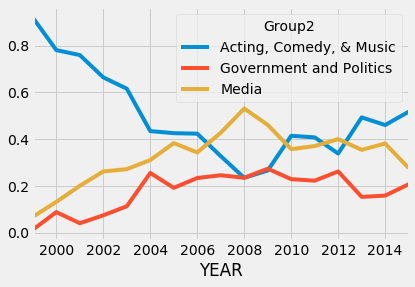

In [2136]:
ds_relevant_groups.groupby('YEAR').Group2.value_counts(normalize=True).unstack().plot()

In [2137]:
display(example2)

###Looking good.  But I still need to change the axis labels, line colors, remove the legend, etc.

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here